# Matching under constraints
Sofia Bennani & Victoire Temam-basse



## 1. Introduction

#### Context
Many-to-one matching problems arise in various real-world scenarios, such as student-school admissions, daycare allocations, and job placements. That means that each student can be matched to at most one school but each school may admit multiple students.
In this project, we explore the  Deferred Acceptance Algorithm (DAA) and its potential modifications under specific constraints, such as capacity limits, demographic quotas, and budget constraints. We also examine other approaches such as fair rankings and fixed-point algorithms. The goal is to assess the complexity, fairness, and feasibility of these solutions.

#### Overview of the Problem

Let $I$ denote a set of students and $S$ a set of schools. Each student $i ∈ I$ has a strict preference order  over the schools, including the option of remaining unmatched. Similarly, each school $s ∈ S$ has a ranking  over the students.

A matching function  assigns each student to at most one school while satisfying institutional constraints.

The main constraints considered include:

- Capacity constraints: Each school s can accept up to $q_s$ students.

- Maximum quota constraints: Schools have upper limits on the number of students from specific demographic groups.

- Fairness constraints: Matchings should minimize justified envy and satisfy policies like the $4/5$ rule (ensuring demographic balance).

- Budget constraints: Schools must operate within financial limits based on student costs.


## 2. The deferred acceptance algorithm and its variants



The students-to-schools problem is a many-to-one matching problem; that is, each student can be matched to at most one school but each school may admit multiple students. Formally, a matching μ is a mapping that satisfies:
$
(i) μ_i ∈SU∅ for all i∈I; 
(ii) μ_s ⊆ I for all s ∈ S; and
(iii) μ_i =s if and only if μ_s∋i for any i ∈ I and s∈S.
$
In words, a matching simply specifies which student is assigned to which school (if any).
There are a number of potentially desirable characteristics of a matching. 
- First, a matching μ is said to be feasible if $μ_s ∈ F_s$ for all s ∈ S. 
- Second, a matching μ is individually rational if $μ_i ≻_i ∅$ for all i ∈ I such that $μ_i \ne ∅$. 
- Third, we say that i has a justified envy towards i′ if there exists s such that $s ≻_i μ_i, i′ ∈ μ_s, and i ≻_s i′$. A matching μ is fair if there exist no students i and i′ such that i has a justified envy toward i′ (regardless of feasibility of the swap). 
- Fourth, a matching μ is non-wasteful if there is no pair (i,s) ∈ I ×S such that s ≻i μi and μs ∪{i} is feasible at s. 

Finally, a matching μ is said to be stable if it is feasible, individual rational, fair,
and non-wasteful.

Each student i ∈ I is endowed with two characteristics: a group gi ∈ G that belongs to a
finite set G of possible groups, and a cost $w_i ∈ R+$. Intuitively, the student’s group represents its demographic attributes such as gender, ethnicity, or disability; based on which discrimination is often forbidden (this will later appear as a constraint). The student’s cost represents the cost for the school having this student. Different students might bring different costs; for instance disable students yield higher costs due to the need for special accommodations, international students yield higher costs due to the need to offer them courses of the local language, etc.


### 2.1 Capacity constraints

#### a. First, we are going to show that, in this case, the above notion of stability coincides with the standard notion from Gale and Shapley

We first consider the simplest case, where the only constraint is a capacity constraint. Each school s has a given capacity $q_s ∈ N$ and can only admit up to $q_s$ students.

In the simplest case where the only constraint is a capacity constraint, the notion of stability coincides with the standard notion from Gale and Shapley, indeed :

In this situation, each school s has a given capacity $q_s \in \mathbb{N}$ and can only admit up to $q_s$ students.
Generally, stability means :
- feasibility : each school cannot exceed its capacity limit
- individual rationality : Every assigned student prefers their matched school over remaining unmatched
- fairness : No student has justified envy towards another student
- non-wasting : If a student prefers an unmatched school that has capacity, they should be admitted.


The standard notion of stability from Gale Shapeley means that $ \nexists (i, s), (i′,s′) ∈ M , ((i′ >_s i) and (s >_{i′} s′)) $. This means that there should be no pair such as :
- student i prefers school s' to his school s
- and school s' would rather have student i (that is not in school s') than student i' (that is in school s')

This condition is satisfied since :
- The deferred acceptance algorithm ensures that each school admits only the most preferred students up to its capacity.
- Any student not assigned to their top-choice school must have been rejected due to a more preferred student taking their place.
- There is no possibility of forming a blocking pair since any student who would prefer another school over their assigned one has already been rejected by that school.

Thus, in this capacity-constrained case, the notion of stability exactly matches the classical stability definition in the Gale-Shapley framework.

#### b. Then we are going to devise and implement a variant of the deferred acceptance algorithm for the school admission problem with capacity constraints (i.e., the many-to-one matching problem) :


In [41]:
from collections import deque

def max_index(current_students,school_pref):
    """
    returns the student (in current_students) of highest index in school_pref
    which means the student matched with the school but is the least wanted by it
    compared to the other students also matched with the school

    """

    index = -1

    for s in current_students:
        i=0

        while i<len(school_pref) and school_pref[i]!=s:
            i+=1

        if i>index :
            index = i

    return school_pref[index]



def deferred_acceptance(schools_pref,students_pref,cap):

    """
    Deferred acceptance algotithm for the school admission problem with capacity constraints

    --> schools_pref : dictionnary containing schools' preferrences :
                        keys are schools' IDs and values are lists of students' IDs in order of preference.

    --> students_pref : dictionnary containing students' preferrences :
                        keys are students' IDs and values are lists of schools' IDs in order of preference.

    --> cap : dictionnary containing the capacities of the schools
                keys are schools' IDs and values are an integer (their capacity)

    """

    # Initialization of the matching (empty)
    match = {s:[] for s in schools_pref.keys() }

    # Initialization of a queue of students not yet matched
    stu = deque(students_pref.keys())

    # To keep track of how many schools already rejected each student (first choices)
    rej = {i: 0 for i in students_pref.keys()}

    while stu : # converts the deque to a boolean which is true if the deque is not empty

        current_stu = stu.popleft()

        #if the student hasn't already been rejected by all the schools (s)he wants we keep going
        if rej[current_stu]<len(students_pref[current_stu]):

            school = students_pref[current_stu][rej[current_stu]] #current school we are looking at for the current student
            rej[current_stu]+=1

            #If the school is not yet at full capacity then put the current student in this school
            if len(match[school])<cap[school] :
                match[school].append(current_stu)

            else :

                #Checking if the school prefers the current student over someone already matched with the school
                current_students = match[school]
                worst = max_index(current_students,schools_pref[school])

                current_student_index = schools_pref[school].index(current_stu)

                if current_student_index < schools_pref[school].index(worst) :
                    # Case where the school prefers the current student over someone already matched with the school

                    # We then replace the "worst" student by the current one

                    match[school].remove(worst)
                    match[school].append(current_stu)

                    # And put the "worst" student back in the deque since (s)he is free again

                    stu.append(worst)

                else :
                    #Case where the current student cannot enter the school
                    #We put him/her back in the deque

                    stu.append(current_stu)

    return match


### 2.2 Maximum quotas

#### a. We are going to propose and implement a modification of the algorithm implemented previously that outputs a matching respecting the maximum quota constraints (quotas per group additionally to the maximum capacity) :

In [42]:
def deferred_acceptance_quotas(schools_pref,students_pref,cap,quotas):

    """
    Deferred acceptance algotithm for the school admission problem with capacity and quotas constraints

    --> schools_pref : dictionnary containing schools' preferrences :
                        keys are schools' IDs and values are lists of students' IDs in order of preference.

    --> students_pref : dictionnary containing students' preferrences and their group:
                        keys are students' IDs and values are lists (first the group then schools' IDs in order of preference)
                        example -> {'i1' : ['A',[s1,s3,s2]]} means that student i1 belongs to group A and prefers school s1 first then s2 etc.

    --> cap : dictionnary containing the capacities of the schools
                keys are schools' IDs and values are integers (capacity of the school)

    --> quotas : dictionnary containing the quotas of the schools for each group
                keys are schools' IDs and values are dictionnaries (quotas for each group)
                example -> {s1 : {'A' : 1, 'B' : 3}} means that the school s1 can accept up to 1 person from group A, 3 from group B etc.

    """

    # Initialization of the matching (empty)
    match = {s:[] for s in schools_pref.keys() }

    # Initialization of a queue of students not yet matched
    stu = deque(students_pref.keys())

    # To keep track of how many schools already rejected each student (first choices)
    rej = {i: 0 for i in students_pref.keys() }

    #How many students from each group admitted in each school
    q = {s: {group : 0 for group in quotas[s]} for s in schools_pref.keys() }

    while stu : # converts the deque to a boolean which is true if the deque is not empty

        current_stu = stu.popleft()

        #if the student hasn't already been rejected by all the schools (s)he wants, we keep going
        if rej[current_stu]<len(students_pref[current_stu]):

            group = students_pref[current_stu][0]
            school = students_pref[current_stu][1][rej[current_stu]] #current school we are looking at for the current student
            quota = quotas[school][group]

            rej[current_stu]+=1

            #If the school is not yet at full capacity
            #and still hasn't reached its quota in the current student's group
            #then put the current student in this school

            if len(match[school])<cap[school] and q[school][group]<quota:
                match[school].append(current_stu)

            else : #It is either a capacity or a quota problem or both :


                #If it is only a capacity problem : we do exactly the same as before

                current_students = match[school]



                if q[school][group]>=quota:

                    #If the problem is (even partially) about quota : we only consider other
                    #students belonging to the same group to be replaced by the current student

                    for i in range (len(current_students)):
                        if students_pref[current_students[i]][0]!= group :
                            del current_students[i]



                #Checking if the school prefers the current student over someone already matched with the school

                worst = max_index(current_students,schools_pref[school])

                current_student_index = schools_pref[school].index(current_stu)

                if current_student_index < schools_pref[school].index(worst) :
                    # Case where the school prefers the current student over someone already matched with the school

                    # We then replace the "worst" student by the current one

                    match[school].remove(worst)
                    match[school].append(current_stu)

                    #update the count of the new student's group in the school

                    q[school][group]+=1

                    #update the count of the replaced student's group in the school

                    worst_group = students_pref[worst][0]
                    q[school][worst_group] -= 1

                    # And put the "worst" student back in the deque since (s)he is free again

                    stu.append(worst)

                else :
                    #Case where the current student cannot enter the school
                    #We put him/her back in the deque

                    stu.append(current_stu)


    return match

### 2.3 Tests

#### Now we are going to test the previous algorithms with simple cases to begin then with more complex ones :

a. Instance 0 : There are 4 students I = {i1, i2, i3, i4} and 2 schools S = {s1, s2} with the following preferences:

- for the students : 
$≻_{i1} : s1, s2
≻_{i2}: s2,s1 
≻_{i3}: s1 
≻_{i4} : s2 $

- for the schools :
$≻_{s1}: i4,i3,i2,i1 
≻_{s2}: i4,i3,i2,i1 $

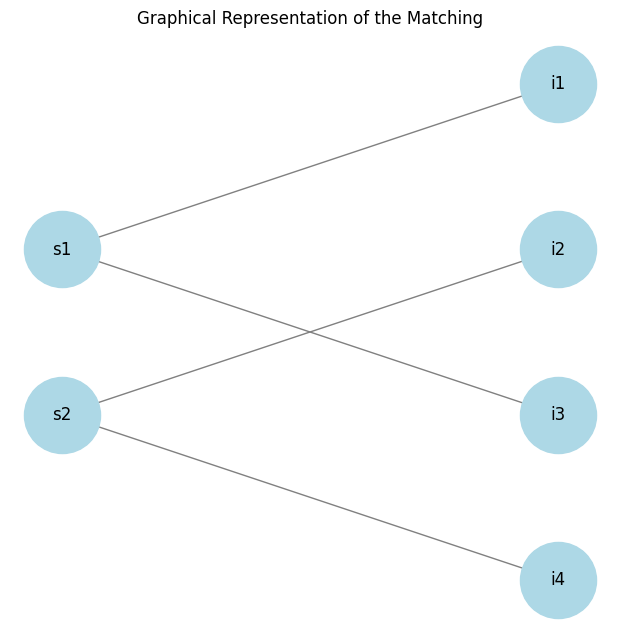

In [43]:
## Values :

students_pref = {
    'i1': ['s1', 's2'],
    'i2': ['s2', 's1'],
    'i3': ['s1'],
    'i4': ['s2']
}

schools_pref = {
    's1': ['i4', 'i3', 'i2', 'i1'],
    's2': ['i4', 'i3', 'i2', 'i1']
}

cap = {'s1': 2, 's2': 2}

## Results using the deferred acceptance algorithm :

match = deferred_acceptance(schools_pref, students_pref, cap)


## Graphic representation of the results :

import networkx as nx
import matplotlib.pyplot as plt

# Creation of a bipartite graph
G = nx.Graph()
students = ['i1', 'i2', 'i3', 'i4']
schools = ['s1', 's2']

# Add nodes
G.add_nodes_from(students, bipartite=0)  # Left side (students)
G.add_nodes_from(schools, bipartite=1)   # Right side (schools)

# Add edges based on the matching
edges = [(student, school) for school, student_list in match.items() for student in student_list]
G.add_edges_from(edges)


# Draw the graph
pos = {}

# Arrange students on the left in the correct order
for i, student in enumerate(students):
    pos[student] = (1, -i)  # 1 places them on the right

# Arrange schools on the right with better spacing
for j, school in enumerate(schools):
    pos[school] = (-1, -j -1)

# Adjust figure size to avoid cutting
plt.figure(figsize=(6, 6))

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=12)
plt.title("Graphical Representation of the Matching")
plt.show()

Conclusion about the results : Coherent with the theoritical results.


#### Instance 1

We take into acount new variables like quotas

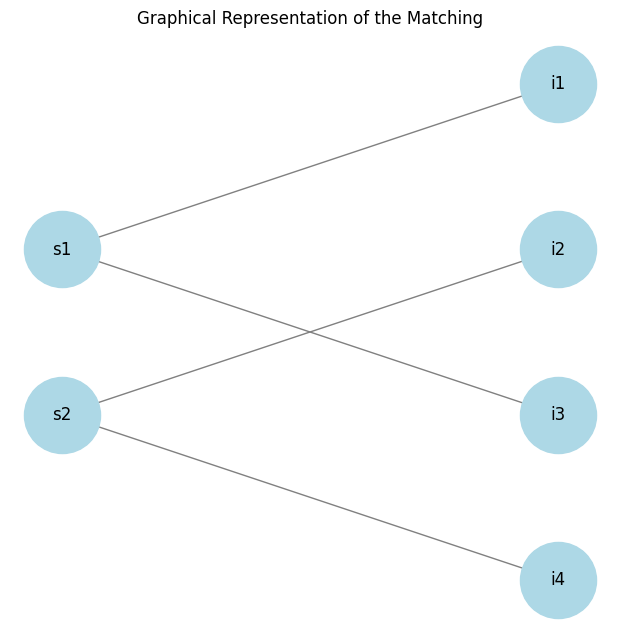

In [44]:
## Values :

students_pref1 = {
    'i1': ['A',['s1', 's2']],
    'i2': ['A',['s2', 's1']],
    'i3': ['A',['s1']],
    'i4': ['B',['s2']]
}

schools_pref1 = {
    's1': ['i4', 'i3', 'i2', 'i1'],
    's2': ['i4', 'i3', 'i2', 'i1']
}

cap1 = {'s1': 2, 's2': 2}

quotas1 = {'s1' : {'A':2,'B':2}, 's2':{'A':2,'B':2}}

## Results using the deferred acceptance algorithm :

match = deferred_acceptance_quotas(schools_pref1, students_pref1, cap1, quotas1)


## Graphic representation of the results :

import networkx as nx
import matplotlib.pyplot as plt

# Creation of a bipartite graph
G = nx.Graph()
students = ['i1', 'i2', 'i3', 'i4']
schools = ['s1', 's2']

# Add nodes
G.add_nodes_from(students, bipartite=0)  # Left side (students)
G.add_nodes_from(schools, bipartite=1)   # Right side (schools)

# Add edges based on the matching
edges = [(student, school) for school, student_list in match.items() for student in student_list]
G.add_edges_from(edges)


# Draw the graph
pos = {}

# Arrange students on the left in the correct order
for i, student in enumerate(students):
    pos[student] = (1, -i)  # 1 places them on the right

# Arrange schools on the right with better spacing
for j, school in enumerate(schools):
    pos[school] = (-1, -j -1)

# Adjust figure size to avoid cutting
plt.figure(figsize=(6, 6))

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=12)
plt.title("Graphical Representation of the Matching")
plt.show()

Conclusion about the results : here, the quotas do not change the results of the matching. This is exactly what is found and represented by the algorithm.


#### Instance 2

There are n students $I = {i_1, · · · , i_n}$ and 2 schools $S = {s_1, s_2}$. Student i’s preference is $≻_i : s_1 , s_2 or ≻_i : s_2 , s_1$ , drawn randomly with uniform probability (independently of the student’s group). Each student i has a latent quality $W_i$, drawn randomly according to a standard normal distribution. Each school observes a noisy version of the student’s quality $Wˆ_i = W_i + ε_i$ where $ε_i$ is a random noise that also follows a standard normal distribution. The noises are independent for the 2 schools. Then each school’s preference list simply ranks the students in decreasing order of observed quality Wˆ .
The set of groups is G = {A,B}. Students I = {i1,··· ,im} are of group A, where m = ⌊$p_A$ · n⌋ and $p_A$ = 9/10 is the fraction of students of group A; other students are of group B. The costs are $w_A$ = 1 for students of group A and $w_B$ = 10 for students of group B. Each school has a capacity of ⌊n/4⌋, and a quota of ⌊0.9n/4⌋ for each group.

For this instance, we will first generate a realization of this random instance and then do the matching on it. We are going to compute and show the number of students that are assigned to their first choice, for each group. Then, we will run multiple realizations and compute average values. Finally, we will test multiple values of n and investigate how the results depend on n briefly.

In [45]:
import random


def m(n):
    return int(0.9*n)


def instance2(n,m):

    """
    returns the number of students that are assigned to their first choice, for each group.

    """


    cap2 = {'s1': int(n/4), 's2': int(n/4)}

    quotas2 = {'s1' : {'A':int(0.9*n/4),'B':int(0.9*n/4)}, 's2':{'A':int(0.9*n/4),'B':int(0.9*n/4)}}


    #Same structure as before :
    students_pref2 = {}
    schools_pref2 = {}

    #for each student, contains the observed quality bu each school :
    s1_quality = {}
    s2_quality = {}

    for i in range(1,n+1):

        #Preference of Student i :

        a = random.uniform(0,1)
        school1 = 's1'
        school2 = 's2'
        if a<0.5:
            school1='s2'
            school2='s1'

        group='A'
        if i>m :
            group='B'

        students_pref2['i'+str(i)]=[group,[school1,school2]]

        #Preference of the schools :

        W = random.gauss(0,1) # W_i : latent quality of student i
        W1 = W + random.gauss(0,1) # noisy version observed by school s1
        W2 = W + random.gauss(0,1) # noisy version observed by school s2

        s1_quality['i'+str(i)]=W1
        s2_quality['i'+str(i)]=W2


    #We still have to build the schools' preference lists based on the observed quality

    def pref_list(quality):

        """
        Returns the school’s preference list by ranking the students in decreasing order of
        observed quality (which is contained in the dictionary "quality").

        """

        l = []
        quality_copy = quality.copy()

        while quality_copy:  # Loop until all students are processed

            maxi = float('-inf')
            stu = None

            # Finding the student with the maximum quality
            for s in quality_copy.keys():
                if quality_copy[s] > maxi:
                    maxi = quality_copy[s]
                    stu = s

            l.append(stu)  # Adding the student with the highest quality
            del quality_copy[stu]  # Removing the student from the copy of the dictionary

        return l


    schools_pref2 = {'s1' : pref_list(s1_quality), 's2' : pref_list(s2_quality) }

    ## Results using the deferred acceptance algorithm :

    matching = deferred_acceptance_quotas(schools_pref2, students_pref2, cap2, quotas2)


    ## Counting the number of students that are assigned
    ## to their first choice in each group

    first_choice = {'A' : 0 , 'B' : 0}

    for s in matching :

        for i in matching[s]:

            group=students_pref2[i][0]

            if students_pref2[i][1][0]==s:
                first_choice[group]+=1

    return first_choice


## first try with n = 100 :

n = 100 # number of students

first_choice = instance2(n,m(n))


print("In the matching obtained : " )
print("Number of student of group A who had their first choice : " + str(first_choice['A']))
print("Number of student of group B who had their first choice : " + str(first_choice['B']))

In the matching obtained : 
Number of student of group A who had their first choice : 33
Number of student of group B who had their first choice : 3


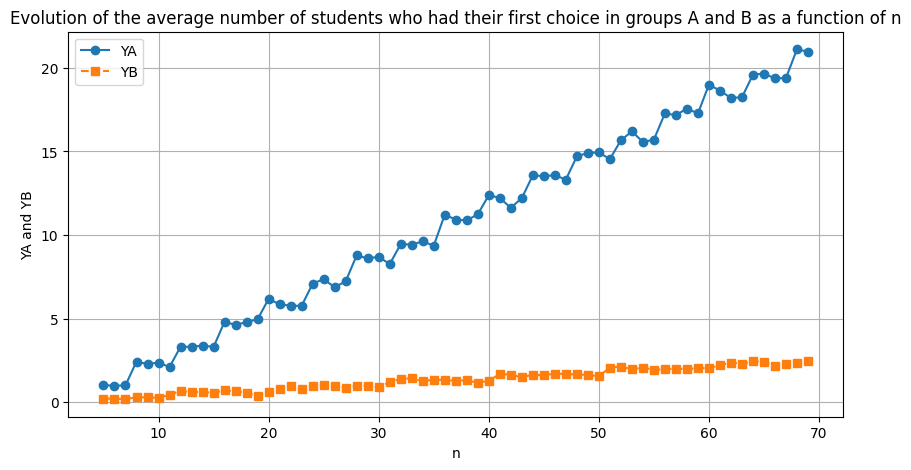

In [46]:
## Multiple realizations and average values :

def avg2(N,n,m):

    """
    returns the average value of the number of first choices
    in both groups A and B based on N realizations

    """
    na,nb=0,0
    for i in range(N):
        f = instance2(n,m)
        na+=f['A']
        nb+=f['B']

    return [na/N,nb/N]


## Dependance of the results on n :

N = 200
YA = []
YB = []
X = []

for n in range (5,70):

    f = avg2(N,n,m(n))
    YA.append(f[0])
    YB.append(f[1])
    X.append(n)

## Representation of the results :

plt.figure(figsize=(10, 5))

plt.plot(X, YA, label="YA", marker="o", linestyle="-")
plt.plot(X, YB, label="YB", marker="s", linestyle="--")


plt.xlabel("n")
plt.ylabel("YA and YB")
plt.title("Evolution of the average number of students who had their first choice in groups A and B as a function of n")
plt.legend()
plt.grid(True)

plt.show()

We can notice that both YA and YB depend on n but in different ways :

- For YA : evolution in stages like the whole part function. Approximation : similar to $ YA_n = \lfloor \frac{n}{3.3} \rfloor $
- For YB : linear evolution with a positive slope. Approximation : similar to $YB_n = \frac{n}{30} $

Let's see how the approximation curves overlap with the real curves :


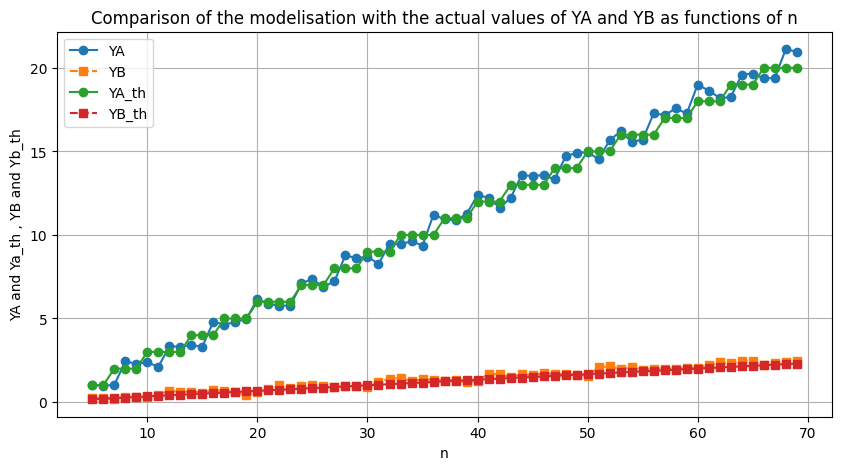

In [47]:
Ya_th = [ int(n/3.3) for n in range(5,70)]
Yb_th = [ n/30 for n in range(5,70)]

## Representation of the results :

plt.figure(figsize=(10, 5))

plt.plot(X, YA, label="YA", marker="o", linestyle="-")
plt.plot(X, YB, label="YB", marker="s", linestyle="--")
plt.plot(X, Ya_th, label="YA_th", marker="o", linestyle="-")
plt.plot(X, Yb_th, label="YB_th", marker="s", linestyle="--")

plt.xlabel("n")
plt.ylabel("YA and Ya_th , YB and Yb_th")
plt.title("Comparison of the modelisation with the actual values of YA and YB as functions of n")
plt.legend()
plt.grid(True)

plt.show()

As a first approach, the approximation of the relation between (YA and n) and (YB and n) seems satisfying. The curves overlap pretty well at first sight. With a deeper analysis we could probably find curves that would overlap even better but it is not the main subject of this project.  

#### Instance 3

Same as Instance 2 but with 4 groups {A, B, C, D} of fractions $p_A$ = 10/20, $p_B$ = 6/20, $p_C$ = 3/20.
Each school still has a quota of ⌊0.9n/4⌋ for each group.

In [48]:
##Variables :

n=100
pa = 10/20
pb = 6/20
pc = 3/20
pd = 1/20

## Adaptation of the model for 4 groups :

def instance3(n,pa,pb,pc,pd):

    """
    returns the number of students that are assigned to their first choice, for each group.

    """


    cap3 = {'s1': int(n/4), 's2': int(n/4)}

    quotas3 = {'s1' : {'A':int(0.9*n/4),'B':int(0.9*n/4),'C':int(0.9*n/4),'D':int(0.9*n/4)}, 's2':{'A':int(0.9*n/4),'B':int(0.9*n/4),'C':int(0.9*n/4),'D':int(0.9*n/4)}}


    #Same structure as before :
    students_pref3 = {}
    schools_pref3 = {}

    #for each student, contains the observed quality bu each school :
    s1_quality = {}
    s2_quality = {}

    for i in range(1,n+1):

        #Preference of Student i :

        a = random.uniform(0,1)
        school1 = 's1'
        school2 = 's2'
        if a<0.5:
            school1='s2'
            school2='s1'

        if i<=int(pa*n):
            group='A'
        elif i<=int((pa+pb)*n):
            group='B'
        elif i<=int((pa+pb+pc)*n):
            group='C'
        else :
            group='D'

        students_pref3['i'+str(i)]=[group,[school1,school2]]

        #Preference of the schools :

        W = random.gauss(0,1) # W_i : latent quality of student i
        W1 = W + random.gauss(0,1) # noisy version observed by school s1
        W2 = W + random.gauss(0,1) # noisy version observed by school s2

        s1_quality['i'+str(i)]=W1
        s2_quality['i'+str(i)]=W2


    #We still have to build the schools' preference lists based on the observed quality

    def pref_list(quality):

        """
        Returns the school’s preference list by ranking the students in decreasing order of
        observed quality (which is contained in the dictionary "quality").

        """

        l = []
        quality_copy = quality.copy()

        while quality_copy:  # Loop until all students are processed

            maxi = float('-inf')
            stu = None

            # Finding the student with the maximum quality
            for s in quality_copy.keys():
                if quality_copy[s] > maxi:
                    maxi = quality_copy[s]
                    stu = s

            l.append(stu)  # Adding the student with the highest quality
            del quality_copy[stu]  # Removing the student from the copy of the dictionary

        return l


    schools_pref3 = {'s1' : pref_list(s1_quality), 's2' : pref_list(s2_quality) }

    ## Results using the deferred acceptance algorithm :

    matching = deferred_acceptance_quotas(schools_pref3, students_pref3, cap3, quotas3)


    ## Counting the number of students that are assigned
    ## to their first choice in each group

    first_choice = {'A' : 0 , 'B' : 0 , 'C' : 0 , 'D' : 0}

    for s in matching :

        for i in matching[s]:

            group=students_pref3[i][0]

            if students_pref3[i][1][0]==s:
                first_choice[group]+=1

    return first_choice




## Multiple realizations and average values :

def avg3(N,n,m):

    """
    returns the average value of the number of first choices
    in groups A, B, C and D based on N realizations

    """
    na,nb,nc,nd=0,0,0,0
    for i in range(N):
        f = instance3(n,pa,pb,pc,pd)
        na+=f['A']
        nb+=f['B']
        nc+=f['C']
        nd+=f['D']

    return [na/N,nb/N,nc/N,nd/N]


## Dependance of the results on n :

N = 200
YA = []
YB = []
YC = []
YD = []
X = []

for n in range (5,70):

    f = avg3(N,n,m(n))
    YA.append(f[0])
    YB.append(f[1])
    YC.append(f[2])
    YD.append(f[3])
    X.append(n)

## Representation of the results :

plt.figure(figsize=(10, 5))

plt.plot(X, YA, label="YA", marker="o", linestyle="-")
plt.plot(X, YB, label="YB", marker="s", linestyle="--")
plt.plot(X, YC, label="YC", marker="l", linestyle="-")
plt.plot(X, YD, label="YD", marker="p", linestyle="--")


plt.xlabel("n")
plt.ylabel("YA, YB, YC and YD")
plt.title("Evolution of the average number of students who had their first choice in groups A and B as a function of n")
plt.legend()
plt.grid(True)

plt.show()


IndexError: list index out of range

The code in the previous cell doesn't work but I do not understand why : the error is a list index out of range error but we cannot understand why this is happening.
So if someone understands it and finds a solution do not hesitate to submit a change !


## 3. Fair rankings

The maximum quotas constraints are limited in that they do not guarantee a minimum number of students from the different groups, which non-discrimination rules typically do. A more stringent notion is known as the 4/5-rule: for any group, the fraction of students of the group at any school cannot be less than 80% or more than 120% of the fraction of students of that group in I.
Guaranteeing that the obtained matching satisfies the 4/5-rule is non-trivial. We consider here a first natural idea: we will modify the schools preference lists such that, for any rank k, the subset of students ranked k or better satisfy the 4/5-rule up to one unit.

#### a. 4/5 rule 
The following algorithm changes schools preference lists so that they satisfy the 4/5-rule up to one unit while minimizing the distance to the initial ranking.

In [49]:
def modify_school_preferences(schools_pref, students_pref):

    modified_preferences = {}
    proportions = count_proportion(students_pref)
    '''
   --> schools_pref : dictionnary containing schools' preferrences :
                       keys are schools' IDs and values are lists of students' IDs in order of preference.

   --> students_pref : dictionnary containing students' preferrences and their group:
                        keys are students' IDs and values are lists (first the group then schools' IDs in order of preference)
                        example -> {'i1' : ['A',[s1,s3,s2]]} means that student i1 belongs to group A and prefers school s1 first then s2 etc.

    --> proportions : dictionnary containing the group's proportion: keys are the type of group and value is the proportion of the group in the entire school population
                example -> {'A' : 0.30, 'B' : 0.70}

    --> modified_preferences : dictionnary containing schools' modified preferences to satisfy the 4/5 rule'''


    for school, school_pref_list in schools_pref.items():
        count = {group: 0 for group in proportions}
        list = []
        'initialization of the group count and of the list built incrementally'

        for student in school_pref_list:
            group = students_pref[student][0]
            count[group]+=1
            list.append(student)
            if not check_rule(count, len(list),  proportions):
                'verify the top-k students follow the rule for all groups, if the rule isnt respected, remove student'
                list.remove(student)
                for i in range(len(school_pref_list)):
                        x = school_pref_list[i]
                        y = students_pref[x][0]
                        if x not in list:
                            count[y] +=1
                            list.append(x)
                            break
                        'we put a student from an underrepresented group in the list'

            modified_preferences[school] = list

    return modified_preferences

'returns a dictionnary with the modified students. the changes only occur when there is an anomaly and at the smallest distance'


def check_rule(group_count, number_students, proportions):
    #Verifies the group count satisfies the rule

    '''
    --> group_count : dictionnary containing the current number of students of the group :
                        keys are groups and values are the currrent number of the groups' students

    --> number_students : integer of the number of students in the top-k list

     --> proportions : dictionnary containing the group's proportion: keys are the type of group and value is the proportion of the group in the entire school population
                 example -> {'A' : 0.30, 'B' : 0.70}
                 '''
    for group, proportion in proportions.items():
        min = 0.8*proportion*number_students
        max = 1.2*proportion*number_students

        if group_count[group]<min or group_count[group]>max:
            return False

    return True

def count_proportion(students_pref):
    group_dictionnary = {}
    total_students = len(students_pref)
    for student, value in students_pref.items():
        group = value[0]
        if group not in group_dictionnary:
            group_dictionnary[group] = 0
        group_dictionnary[group] +=1
    group_proportions = {group: count/total_students for group, count in group_dictionnary.items()}
    return group_proportions



#### b. Tests
Now, let's apply the deferred acceptance algorithm (with quotas) on the new rankings in the instances, and see if the final matchings satisfy the 4/5-rule :

##### Instance 1

In [50]:
modif = modify_school_preferences(schools_pref1, students_pref1)

matching = deferred_acceptance_quotas(modif, students_pref1, cap1, quotas1)

def check_matching(matching, students_pref):
    proportions = count_proportion(students_pref1)
    for school, students in matching.items():
        students_from_matching_pref = {}
        for eleve in students:
            students_from_matching_pref[eleve] = students_pref[eleve]
        school_proportion = count_proportion(students_from_matching_pref)
        for group, prop in proportions.items():
            if not (0.8*prop<=school_proportion[group] and school_proportion[group]<=1.2*prop):
                return False
    return True

print(check_matching(matching, students_pref1), "for instance 1")



False for instance 1


We are supposed to find false as there is no matching for this instance that satisfies the 4/5 rule. Indeed, we cannot obtain the right percentage of B in any matching possible.

##### Instance 2

In [51]:
import random
n=10

def m(n):
    return int(0.9*n)

cap = {'s1': int(n/4), 's2': int(n/4)}

quotas = {'s1' : {'A':int(0.9*n/4),'B':int(0.9*n/4)}, 's2':{'A':int(0.9*n/4),'B':int(0.9*n/4)}}


#Same structure as before :
student_pref = {}
school_pref = {}

#for each student, contains the observed quality by each school :
s1_quality = {}
s2_quality = {}

for i in range(1,n+1):

    #Preference of Student i :

    a = random.uniform(0,1)
    school1 = 's1'
    school2 = 's2'
    if a<0.5:
        school1='s2'
        school2='s1'

    group='A'
    if i>m(n) :
        group='B'

    student_pref['i'+str(i)]=[group, [school1,school2]]

    #Preference of the schools :

    W = random.gauss(0,1) # W_i : latent quality of student i
    W1 = W + random.gauss(0,1) # noisy version observed by school s1
    W2 = W + random.gauss(0,1) # noisy version observed by school s2

    s1_quality['i'+str(i)]=W1
    s2_quality['i'+str(i)]=W2


#We still have to build the schools' preference lists based on the observed quality

def pref_list(quality):

    """
    Returns the school’s preference list by ranking the students in decreasing order of
    observed quality (which is contained in the dictionary "quality").

    """

    l = []
    quality_copy = quality.copy()

    while quality_copy:  # Loop until all students are processed

        maxi = float('-inf')
        stu = None

        # Finding the student with the maximum quality
        for s in quality_copy.keys():
            if quality_copy[s] > maxi:
                maxi = quality_copy[s]
                stu = s

        l.append(stu)  # Adding the student with the highest quality
        del quality_copy[stu]  # Removing the student from the copy of the dictionary

    return l


school_pref = {'s1' : pref_list(s1_quality), 's2' : pref_list(s2_quality) }

modif = modify_school_preferences(school_pref, student_pref)

matching = deferred_acceptance_quotas(modif, student_pref, cap, quotas)

def check_matching(matching, students_pref):
    proportions = count_proportion(students_pref)
    for school, students in matching.items():
        students_from_matching_pref = {}
        for eleve in students:
            if eleve in students_pref:
                students_from_matching_pref[eleve] = students_pref[eleve]
        school_proportion = count_proportion(students_from_matching_pref)
        for group, prop in proportions.items():
            school_group_prop = school_proportion.get(group, 0)
            if not (0.8 * prop <= school_group_prop <= 1.2 * prop):
                return False
    return True

print(check_matching(matching, student_pref), "for instance 2")

False for instance 2


The resultas are also coherent here. 
Still no results possible for instance 3 since we cannot seem to build it correctly.

## 4. A fixed-point algorithm for arbitrary constraints

In a recent paper, Kamada and Kojima proposed a new algorithm based on a fixed-point to find a matching with good properties under arbitrary constraints. With arbitrary constraints, finding a stable matching is impossible in general. Therefore, we will drop the property of non-wastefulness and look for matchings that are feasible, individually rational and fair. Kamada and Kojima showed that such matchings can be characterized as the solutions to a fixed point problem as follows.

Consider the space of cutoff profiles P = {1, · · · , |I|, |I| + 1}S (i.e., the space of functions from S to {1, · · · , |I|, |I| + 1}), endowed with a partial order ≤ such that two profiles p, p′ ∈ P satisfy p≤p′ if and only if ps is weakly smaller than p′s for all s∈S. For each school s∈S,let i(s,l) be the student whose rank is the lth from the bottom according to the preference list of s (e.g., i(s,|I|) is the best student for s). Also consider a hypothetical student i∗ ∈/ I such that i∗ =i(s,|I|+1) for all s∈S and expand the domain of≻s for each s∈S so that i∗ ≻$s_i$ for all i ∈ I. Given a cutoff profile p ∈ P, we define the demand at school s as :

$ D_s(p)$ = {$i ∈ I|i ⪰_s i^{(s,ps)} and s ≻_i ∅ ; i ⪰_{s′} i^{(s′,ps′)} ⇒ s ⪰_i s′$} 

In this definition, the first part $“i ⪰_s i^{(s,ps)} and s ≻_i ∅ ” $ says that student i is as good as the cutoff student $i^{(s,ps)}$ and finds s acceptable, while the second part "$i ⪰_{s′} i^{(s′,ps′)} ⇒ s ⪰_i s′$” says that s is the most preferred school among the ones at which i passes the cutoff. 
The demand for s is a collection of students who meet those two criteria.
We consider a mapping T : P → P , called the cutoff adjustment function, defined as follows:
for all s ∈ S
􏰀ps+1 ifDs(p)∈/Fs, Ts(p) = ps if Ds(p) ∈ Fs;
where we set by convention (|I|+1)+1 = 1 to ensure that the range of T is P. That is, for each s and cutoff profile, this mapping raises the cutoff at s by one if the demand for s is infeasible, and leaves the cutoff unchanged if it is feasible.
For each p ∈ P , let μp be the matching such that
μps = Ds(p) for each s ∈ S.
That is, μps simply matches all students who demand s given cutoff profile p. Then, Kamada and Kojima [2] show the following result:

Theorem 1 : If a cutoff profile p ∈ P is a fixed point of the cutoff adjustment function T , then $μ_p$ is feasible, individually rational, and fair. Moreover, if μ is a feasible, individually rational, and fair matching, then there exists a cutoff profile p ∈ P with μ = $μ_p$ that is a fixed point of T .
There exist sufficient conditions to guarantee the existence of a fixed-point (called “general upper bound”). Here, we admit that these conditions are satisfied for capacity constraints and for maximum quota constraints. They are not satisfied, however, for constraints corresponding to the 4/5-rule.


#### Implementation of the algorithm 

We are going to implement the algorithm described with a feasibility function encoding arbitrary feasible sets.

In [52]:
from itertools import combinations

def generate_feasibility_constraints(school_pref, capacities):
    """
    Generates feasibility constraints for each school based on capacity.
    For each school, feasible sets are all possible subsets of its preference list
    with size less than or equal to the school's capacity.
    """
    feasibility_constraints = {}
    for school, pref in school_pref.items():
        capacity = capacities[school]
        feasible_sets = []
        for size in range(0, capacity + 1):
            feasible_sets.extend(list(combinations(pref, size)))
        feasibility_constraints[school] = [list(subset) for subset in feasible_sets]
    return feasibility_constraints

def demand_set(student_pref, school_pref, cutoff_profile, school):
    """
    Calculates the demand set for a school given the current cutoff profile.
    """
    demand = []
    for i in school_pref[school][:cutoff_profile[school]]:
        # Determine the schools (only from student's preference list) for which i is above the cutoff.
        eligible_schools = []
        for s in student_pref[i]:
            if i in school_pref[s][:cutoff_profile[s]]:
                eligible_schools.append(s)
        if eligible_schools:
            # Pick the best school for i according to i's preferences.
            best_school = min(eligible_schools, key=lambda x: student_pref[i].index(x))
            if best_school == school:
                demand.append(i)
    return demand

def cutoff_adjustment(student_pref, school_pref, feasibility_constraints):
    """
    Iteratively adjusts the cutoff profiles until a fixed point is reached.

    For each school, the cutoff starts at its capacity and increases until the
    corresponding demand set is a feasible set.
    """
    n = len(student_pref)
    cutoff_profiles = {school: capacities[school] for school in school_pref.keys()}

    changed = True
    while changed:
        changed = False
        for school in school_pref.keys():
            demand = demand_set(student_pref, school_pref, cutoff_profiles, school)
            if demand not in feasibility_constraints[school]:
                if cutoff_profiles[school] >= n:
                    continue
                cutoff_profiles[school] += 1
                changed = True
    return cutoff_profiles

def find_matching(student_pref, school_pref, cutoff_profile):
    """
    Finds the matching for each school based on the final cutoff profiles.
    """
    matching = {}
    for school in school_pref.keys():
        matching[school] = demand_set(student_pref, school_pref, cutoff_profile, school)
    return matching

#### Tests with capacities constraints only

Now we are going to test the algorithm on the Instances 1-3 from, with only capacity constraints, and compare to the outcome of the algorithm from Task 2.

##### Instance 1

In [53]:
#Instance 1
student_pref = {
    'i1': ['s1', 's2'],
    'i2': ['s2', 's1'],
    'i3': ['s1'],
    'i4': ['s2']
}

school_pref = {
    's1': ['i4', 'i3', 'i2', 'i1'],
    's2': ['i4', 'i3', 'i2', 'i1']
}

capacities = {'s1': 2, 's2': 2}

feasibility_constraints = generate_feasibility_constraints(school_pref, capacities)
final_cutoff_profiles = cutoff_adjustment(student_pref, school_pref, feasibility_constraints)
final_matching = find_matching(student_pref, school_pref, final_cutoff_profiles)
print("Final Matching for instance 1:", final_matching)


Final Matching for instance 1: {'s1': ['i3'], 's2': ['i4']}


--> For school s1, with a cutoff of 2, its top two candidates are [i4, i3]. When we compute the demand set for s1, we examine each candidate:
- For i4, although i4 appears in s1’s top two, i4’s own preference list is [s2] (i.e. i4 only finds s2 acceptable). So i4 is not “eligible” for s1.
- For i3, i3’s preference list is [s1]. Since i3 is above the cutoff for s1 and s1 is the only school in i3’s list, i3 is included.

Thus, the demand for s1 becomes [i3].

--> For school s2, its top two candidates are [i4, i3]. Now, for each candidate:
- For i4, i4’s only preference is s2 and i4 is in s2’s top two, so i4 is included.
- For i3, although i3 appears in s2’s ranking, i3 is not on i3’s preference list (i3 only prefers s1), so i3 is not eligible for s2.

Thus, the demand for s2 becomes [i4].


--> We do not have the same outcome, because the non-wastefulness criteria isn't met in this algorithm.

##### Instances 2 and 3

In [54]:
#Instance 2 and 3 (because there are no quotas)
import random
n=10

capacities = {'s1': int(n/4), 's2': int(n/4)}
s1_quality = {}
s2_quality = {}
student_pref = {}

for i in range(1, n+1):
    # Determine the student's school preferences
    a = random.uniform(0, 1)
    school1 = 's1'
    school2 = 's2'
    if a < 0.5:
        school1 = 's2'
        school2 = 's1'
    student_pref['i' + str(i)] = [school1, school2]

    # Generate the student's latent quality and noisy observations
    W = random.gauss(0, 1)  # latent quality of student i
    W1 = W + random.gauss(0, 1)  # noisy version for school s1
    W2 = W + random.gauss(0, 1)  # noisy version for school s2

    s1_quality['i' + str(i)] = W1
    s2_quality['i' + str(i)] = W2

# Sort the student IDs for each school by their observed quality (highest first)
pref_list1 = sorted(s1_quality, key=s1_quality.get, reverse=True)
pref_list2 = sorted(s2_quality, key=s2_quality.get, reverse=True)

school_pref = {'s1': pref_list1, 's2': pref_list2}


feasibility_constraints = generate_feasibility_constraints(school_pref, capacities)
final_cutoff_profiles = cutoff_adjustment(student_pref, school_pref, feasibility_constraints)
final_matching = find_matching(student_pref, school_pref, final_cutoff_profiles)
print("Final Matching for instance 2 and 3:", final_matching)


Final Matching for instance 2 and 3: {'s1': ['i6'], 's2': ['i4', 'i8']}


#### Test with capacities and quotas constraints

We are going to test the algorithm on the Instances 1-3 with the maximum quota constraint (in addition to capacity constraints) and compare to the previous outcomes (with the previous algorithm).

In [55]:
from itertools import combinations

def generate_feasibility_constraints(school_pref, capacities, max_quotas, student_groups):
    """
    Generates feasibility constraints for each school taking into account both the overall capacity and
    the maximum quota per group.

    --> quotas: dictionnary whose keys are schoold id and value is the group quota {'s1': {'A': 2, 'B': 2}, ...}
    --> student_groups: dictionnary whose key is student id and value is its group {'i1': 'A', 'i2': 'B', ...}
    """
    feasibility_constraints = {}
    for school, pref in school_pref.items():
        capacity = capacities[school]
        feasible_sets = []
        # Retrieve the maximum quotas for the school (if not provided, assume no group constraint)
        school_quota = quotas.get(school, {})
        # Generate all possible subsets up to overall capacity
        for size in range(0, capacity + 1):
            for subset in combinations(pref, size):
                valid = True
                # Check each group's quota in the subset.
                for group, quota in school_quota.items():
                    # Count the number of students in the subset belonging to this group.
                    count = sum(1 for student in subset if student_groups.get(student) == group)
                    if count > quota:
                        valid = False
                        break
                if valid:
                    feasible_sets.append(list(subset))
        feasibility_constraints[school] = feasible_sets
    return feasibility_constraints


def demand_set(student_pref, school_pref, cutoff_profile, school):
    """
    Calculates the demand set for a school given the current cutoff profile.
    """
    demand = []
    for i in school_pref[school][:cutoff_profile[school]]:
        # Determine the schools (only from student's preference list) for which i is above the cutoff.
        eligible_schools = []
        for s in student_pref[i]:
            if i in school_pref[s][:cutoff_profile[s]]:
                eligible_schools.append(s)
        if eligible_schools:
            # Pick the best school for i according to i's preferences.
            best_school = min(eligible_schools, key=lambda x: student_pref[i].index(x))
            if best_school == school:
                demand.append(i)
    return demand

def cutoff_adjustment(student_pref, school_pref, feasibility_constraints):
    """
    Iteratively adjusts the cutoff profiles until a fixed point is reached.

    For each school, the cutoff starts at its capacity and increases until the
    corresponding demand set is a feasible set.
    """
    n = len(student_pref)
    cutoff_profiles = {school: capacities[school] for school in school_pref.keys()}

    changed = True
    while changed:
        changed = False
        for school in school_pref.keys():
            demand = demand_set(student_pref, school_pref, cutoff_profiles, school)
            if demand not in feasibility_constraints[school]:
                if cutoff_profiles[school] >= n:
                    continue
                cutoff_profiles[school] += 1
                changed = True
    return cutoff_profiles

def find_matching(student_pref, school_pref, cutoff_profile):
    """
    Finds the matching for each school based on the final cutoff profiles.
    """
    matching = {}
    for school in school_pref.keys():
        matching[school] = demand_set(student_pref, school_pref, cutoff_profile, school)
    return matching



#### Test with the 4/5 rule

What happens if we try to run the algorithm with the 4/5-rule constraint ?

In [56]:
student_pref = {
    'i1': ['s1', 's2'],
    'i2': ['s2', 's1'],
    'i3': ['s1'],
    'i4': ['s2']
}

student_groups = {'i1': 'A', 'i2': 'A', 'i3': 'A', 'i4': 'B'}

school_pref = {
    's1': ['i4', 'i3', 'i2', 'i1'],
    's2': ['i4', 'i3', 'i2', 'i1']
}

capacities = {'s1': 2, 's2': 2}

quotas = {'s1' : {'A':2,'B':2}, 's2':{'A':2,'B':2}}

modif = modify_school_preferences(schools_pref, students_pref)

feasibility_constraints = generate_feasibility_constraints(modif, capacities, quotas, student_groups)
final_cutoff_profiles = cutoff_adjustment(student_pref, modif, feasibility_constraints)
final_matching = find_matching(student_pref, modif, final_cutoff_profiles)
print("Final Matching for instance 1 with quotas:", final_matching)

Final Matching for instance 1 with quotas: {'s1': ['i3'], 's2': ['i4']}


## 5. Matching without stability constraints

In this last section, we disregard stability (or fairness) conditions for the matchings and instead look for “optimal” matchings in a centralized sense (i.e., assuming that a central authority can enforce the matching even in the presence of blocking pairs). Instead of a capacity constraint, we now assume that each school s has a budget constraint Ws, that is, the school can admit a subset $I′$ of students only if $ \sum_{i∈I′}{w_i} ≤ W_s$.

### 5.1 The case of a single school  



Let's propose an algorithm that maximizes the number of assigned students with a budget constraints and the 4/5-rule constraint.

In [57]:
def match_single_school(students, costs, budget, student_groups, fairness_constraint):
    """
    Maximizes the number of students assigned to a single school while respecting budget and fairness constraint.
    """
    selected_students = []
    total_cost = 0

    # Sort students by cost (cheapest first) to maximize assignments
    sorted_students = sorted(students, key=lambda i: costs[i])

    for student in sorted_students:
        if total_cost + costs[student] <= budget:
            selected_students.append(student)
            total_cost += costs[student]

    # Apply 4/5 fairness rule constraint if necessary
    #if fairness_constraint:
        #selected_students = enforce_fairness(selected_students, student_groups)

    return selected_students

For now, the code in the previous cell only satisfies the budget constraint.

The idea here would be : having a "enforce_fairness" function which, given le current list of students selcted that satisfies the budget constraints but not necessarily the 4/5 rule, returns a list of selected students that satisfies the 2 constraints.

Unfortunately, because of a lack of time, we did not implement this function.

#### Test

Let's test the algorithm on the Instances 1-3 with the following modification: s1 and s2 are merged —i.e., they are the same school. The budget is $W_s$ = 11 for Instance 1 and $W_s$ = 3n for Instances 2-3.


##### Instance 1

In [59]:
students = ['i1', 'i2', 'i3', 'i4']
costs = {'i1': 1, 'i2': 1, 'i3': 1, 'i4': 10}
budget = 11  # Combined budget after merging schools
student_groups = {'i1': 'A', 'i2': 'A', 'i3': 'A', 'i4': 'B'}
result = match_single_school(students, costs, budget, student_groups, fairness_constraint=True)
print("Task 12 Result: for the only school considered in this part, the students selected are ", result)


Task 12 Result: for the only school considered in this part, the students selected are  ['i1', 'i2', 'i3']


As we explained earlier, we can see that the budget constraint is respected but not the 4/5 rule.

However, even with a code that would satisfy the 4/5 rule, in this instance it is impossible to satisfy it anyway.